In [20]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
X

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [21]:
x = X[:,0]
y = X[:,1]

In [22]:
x

array([1. , 1.5, 5. , 8. , 1. , 9. ])

In [23]:
y

array([ 2. ,  1.8,  8. ,  8. ,  0.6, 11. ])

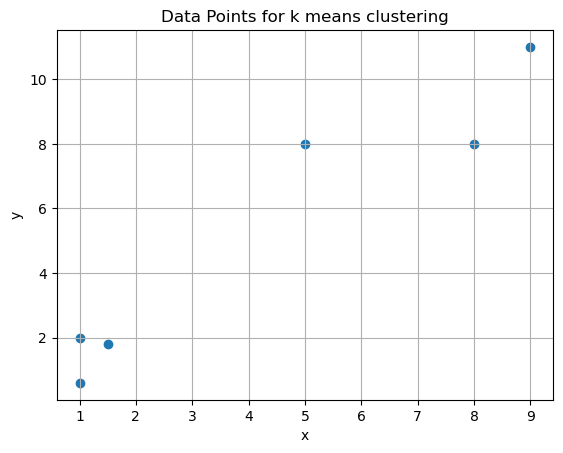

In [32]:
plt.scatter(x, y)
plt.grid(True)
# Set axis labels
plt.xlabel('x')
plt.ylabel('y')

# Set plot title
plt.title('Data Points for k means clustering')

# Display the plot
plt.show()

In [45]:
# Create a KMeans instance with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit_predict(X)

C:\Users\Ramiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ramiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 0, 0, 1, 0])

In [28]:
X

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [37]:
labels = kmeans.labels_
labels

array([1, 1, 0, 0, 1, 0])

In [38]:

# Get the cluster centers
centers = kmeans.cluster_centers_
centers

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

In [43]:
#predict
kmeans.predict([[9.1,10.2]])

array([0])

In [44]:
#predict
kmeans.predict([[1.1,2.2]])

array([1])

In [46]:
#soft clustering
kmeans.transform([[1.1,2.2]])

array([[9.224665 , 0.7363574]])

In [47]:
#soft clustering
kmeans.transform([[9.1,10.2]])

array([[ 2.1356758 , 11.79868166]])

In [48]:
kmeans.inertia_

15.98

In [51]:
kmeans.score(X)

-15.98

### kmean in loop to run for a given range of cluster numbers and find max silhouette score

In [72]:
from sklearn.metrics import silhouette_score

cluster_range = range(2,5)
best_score = -1
best_cluster = None

for r in cluster_range:
    
    #initialzie kmeans with the cluster size $i
    #print('cluster size:',r)
    kmeans = KMeans(n_clusters=r, random_state=42)
    
    #fit input data
    kmeans.fit(X)
    
    #get labels
    labels = kmeans.labels_
    
    #get silhouette score
    score = silhouette_score(X, labels)
    
    #print("score : ", score)
    
    #get max score
    if score > best_score:
        best_score = score
        best_cluster = r

print('Best score is ==', best_score)
print('Best cluster size == ', best_cluster)
    
###now we have found best cluster size, rerun the kmeans with the best cluster size
kmeans = KMeans(n_clusters=best_cluster, random_state=42)
kmeans.fit_predict(X)
    

C:\Users\Ramiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ramiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ramiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Best score is == 0.7479566620911685
Best cluster size ==  2


C:\Users\Ramiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ramiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 0, 0, 1, 0])